# Task 2

Perform hyper-parameter tuning on the DecisionTree algorithm in order to predict the target column "pulse" for the status of each horse in the dataset. Use 5-fold cross-validation for the hyper-parameter tuning, tune the parameters "max_features", "max_depth", and "min_samples_split". Provide at least 3 values for each parameter.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset description

### Features

* id - horse identifier
* surgery - was the horse in surgery (0 - no, 1 - yes)
* age - if the horse is young or old (0 - old, 1 - young)
* hospital_number - the identifier of the hospital the horse was treated in
* rectal_temp - the horse's rectal temperature
* respiratory_rate - the horse's respiratory rate
* temp_of_extremities - the horse's temperature of the extremities (represented as categories ordered by intensity)
* nasogastric_reflux_ph - ph value of the horse's nasogastric reflux
* packed_cell_volume - volume of horse's packed cell
* total_protein - horse's total protein value
* abdomo_protein - horse's abdominal protein value
* surgical_lesion - whether the horse has a surgical lesion or not
* lesion_1 - size of the lesion (0 if the horse doesn't have one)
* cp_data - binary variable

### Target variable
* pulse - the horse's pulse

### Download the dataset

In [ ]:
! gdown 1-6y_xGi204yBOq8q_4-i1J-afXxVBHKB

Downloading...
From: https://drive.google.com/uc?id=1-6y_xGi204yBOq8q_4-i1J-afXxVBHKB
To: /content/data_g2.csv
100% 72.4k/72.4k [00:00<00:00, 113MB/s]


### Read the dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df=pd.read_csv("/content/data_g2.csv")

In [ ]:
df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,cp_data
0,0,1,0,530001,38.1,132.0,24.0,2,6.5,57.0,8.5,3.4,1,2209,0
1,1,1,0,533836,37.5,88.0,12.0,2,2.0,33.0,64.0,2.0,1,2208,0
2,2,1,0,529812,38.3,120.0,28.0,2,3.5,37.0,6.4,3.4,1,5124,0
3,3,1,0,5262541,37.1,72.0,30.0,1,2.0,53.0,7.0,3.9,1,2208,1
4,4,0,0,5299629,38.0,52.0,48.0,3,7.0,47.0,7.3,2.6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,1,0,535246,38.5,129.0,48.0,2,2.0,57.0,66.0,2.0,1,2206,0
1231,1231,1,0,528570,37.5,60.0,50.0,2,3.0,35.0,6.4,3.6,1,2209,1
1232,1232,1,1,529685,37.5,84.0,40.0,3,3.0,40.0,5.9,7.0,1,400,1
1233,1233,1,0,534784,38.1,70.0,16.0,3,2.0,58.0,74.0,2.0,1,2209,0


In [ ]:
df.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
cp_data                  0
dtype: int64

### Check if dataset is balanced, or if not applicable give your reasons why



array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'surgery'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hospital_number'}>],
       [<Axes: title={'center': 'rectal_temp'}>,
        <Axes: title={'center': 'pulse'}>,
        <Axes: title={'center': 'respiratory_rate'}>,
        <Axes: title={'center': 'temp_of_extremities'}>],
       [<Axes: title={'center': 'nasogastric_reflux_ph'}>,
        <Axes: title={'center': 'packed_cell_volume'}>,
        <Axes: title={'center': 'total_protein'}>,
        <Axes: title={'center': 'abdomo_protein'}>],
       [<Axes: title={'center': 'surgical_lesion'}>,
        <Axes: title={'center': 'lesion_1'}>,
        <Axes: title={'center': 'cp_data'}>, <Axes: >]], dtype=object)

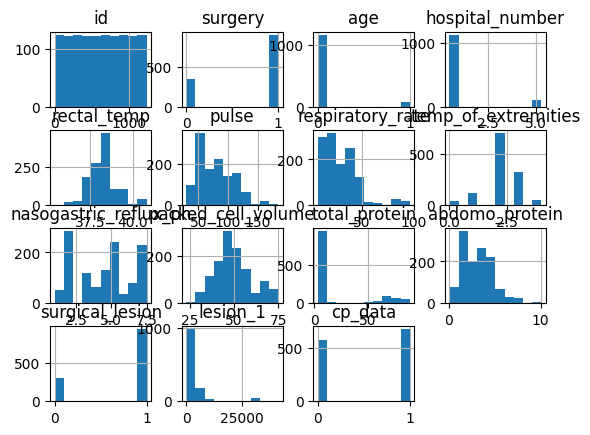

In [ ]:
df.hist()

<Axes: >

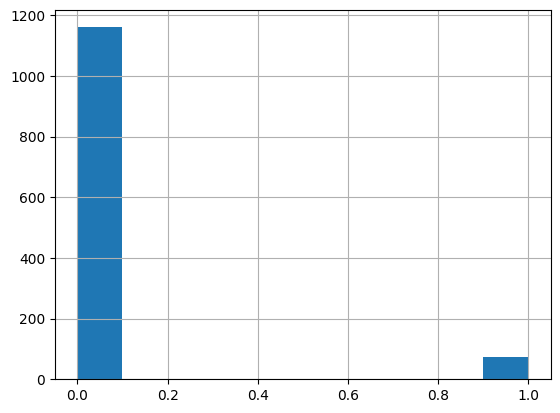

In [ ]:
df.age.hist()

од хисто грамите моземе да забележеме дека дата сетот не е балансиран највише се забелезува кај колоната age ansd hospital number и останатие

### Perform all necessary transformations of the data

In [ ]:
ds=df.copy()

In [ ]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'nasogastric_reflux_ph',
       'packed_cell_volume', 'total_protein', 'abdomo_protein',
       'surgical_lesion', 'lesion_1', 'cp_data'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
cf=[ 'surgery', 'age', 'hospital_number', 'rectal_temp',
       'respiratory_rate', 'temp_of_extremities', 'nasogastric_reflux_ph',
       'packed_cell_volume', 'total_protein', 'abdomo_protein',
       'surgical_lesion', 'lesion_1', 'cp_data']

In [16]:
ds[cf]=scaler.fit_transform(ds[cf])

In [19]:
X,Y=ds.drop(columns=['pulse']),ds['pulse']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(Y_test, y_pred)

625.7677639947418

### Hyper-parameter tuning and cross-validation

Choose a metric to optimize, choose hyper parameter values to experiment with, perform 5-fold cross-validation.

### Evaluate the performance of the best model using multiple metrics

Calculate metrics

Display a confusion matrix if applicable